<a href="https://colab.research.google.com/github/Shiyasalloor/Machine_Learning_And_Parellel_Computing/blob/main/Question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Training set: (48000, 784), (48000,)
Validation set: (12000, 784), (12000,)
Test set: (10000, 784), (10000,)


In [2]:
log_reg = LogisticRegression(solver='saga', max_iter=100, verbose=1)
log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_val)

max_iter reached after 187 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [3]:
from sklearn.metrics import classification_report

print("Validation Performance:")
print(classification_report(y_val, y_pred, digits=4))


Validation Performance:
              precision    recall  f1-score   support

           0     0.9482    0.9668    0.9574      1175
           1     0.9244    0.9705    0.9469      1322
           2     0.9096    0.8995    0.9045      1174
           3     0.9100    0.8794    0.8945      1219
           4     0.9130    0.9456    0.9290      1176
           5     0.8869    0.8741    0.8805      1104
           6     0.9467    0.9507    0.9487      1177
           7     0.9306    0.9284    0.9295      1299
           8     0.9013    0.8578    0.8790      1160
           9     0.9048    0.8995    0.9021      1194

    accuracy                         0.9182     12000
   macro avg     0.9175    0.9172    0.9172     12000
weighted avg     0.9179    0.9182    0.9179     12000



In [4]:
from sklearn.metrics import classification_report

print("Validation Performance:")
print(classification_report(y_val, y_pred, digits=4))


Validation Performance:
              precision    recall  f1-score   support

           0     0.9482    0.9668    0.9574      1175
           1     0.9244    0.9705    0.9469      1322
           2     0.9096    0.8995    0.9045      1174
           3     0.9100    0.8794    0.8945      1219
           4     0.9130    0.9456    0.9290      1176
           5     0.8869    0.8741    0.8805      1104
           6     0.9467    0.9507    0.9487      1177
           7     0.9306    0.9284    0.9295      1299
           8     0.9013    0.8578    0.8790      1160
           9     0.9048    0.8995    0.9021      1194

    accuracy                         0.9182     12000
   macro avg     0.9175    0.9172    0.9172     12000
weighted avg     0.9179    0.9182    0.9179     12000



In [5]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['saga', 'lbfgs']
}

grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial', max_iter=500), param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_val)

print("Best Model Performance:")
print(classification_report(y_val, y_pred_best, digits=4))


Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Parameters: {'C': 10, 'solver': 'saga'}
Best Model Performance:
              precision    recall  f1-score   support

           0     0.9579    0.9685    0.9632      1175
           1     0.9303    0.9697    0.9496      1322
           2     0.9066    0.8927    0.8996      1174
           3     0.9098    0.8934    0.9015      1219
           4     0.9274    0.9447    0.9360      1176
           5     0.9032    0.8786    0.8907      1104
           6     0.9437    0.9541    0.9489      1177
           7     0.9366    0.9330    0.9348      1299
           8     0.8980    0.8724    0.8850      1160
           9     0.9057    0.9087    0.9072      1194

    accuracy                         0.9225     12000
   macro avg     0.9219    0.9216    0.9216     12000
weighted avg     0.9222    0.9225    0.9223     12000



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


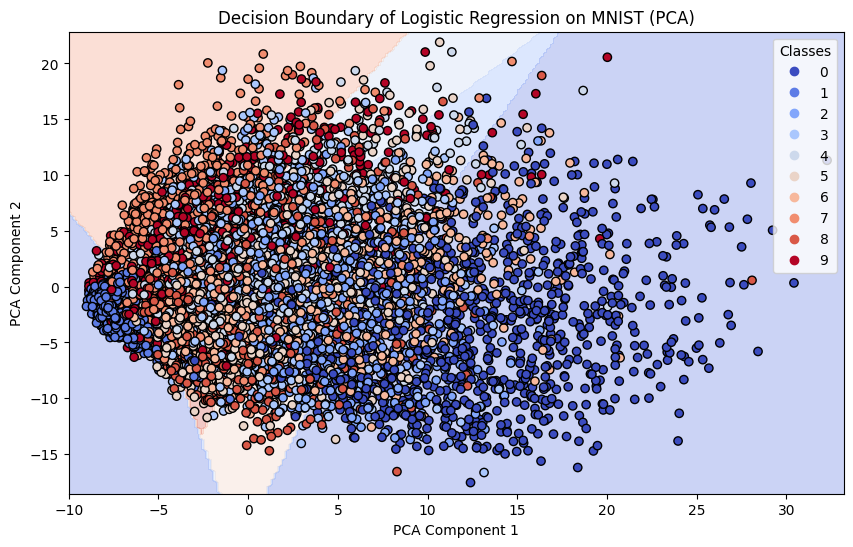

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

log_reg_pca = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000)
log_reg_pca.fit(X_train_pca, y_train)

def plot_decision_boundary(model, X, y):
    h = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap="coolwarm")
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title("Decision Boundary of Logistic Regression on MNIST (PCA)")
    plt.show()

plot_decision_boundary(log_reg_pca, X_val_pca, y_val)
